<a href="https://colab.research.google.com/github/Rhuan-Messias/LLM_RAG_Study/blob/main/hugging_face_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
gpu = !nvidia-smi
gpu

['Sat Nov 15 19:16:51 2025       ',
 '+-----------------------------------------------------------------------------------------+',
 '| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |',
 '|-----------------------------------------+------------------------+----------------------+',
 '| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |',
 '|                                         |                        |               MIG M. |',
 '|=========================================+========================+======================|',
 '|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |',
 '| N/A   51C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |',
 '|                                         |                        |                  N/A |',
 '+-

In [3]:
import gradio as gr
from huggingface_hub import login
from google.colab import userdata

hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

text_encoder_2/model.safetensors:   0%|          | 0.00/2.78G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/10.3G [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/5 [00:00<?, ?it/s]

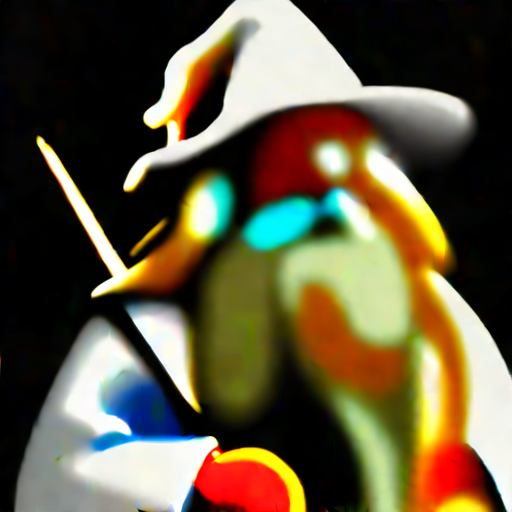

In [6]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16)
pipe.to("cuda")
display(pipe(prompt="a photo of gandalf the white", num_inference_steps=5, guidance_scale=7.5).images[0])

In [1]:
!pip install -q --upgrade datasets==3.6.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 8.8 MB/s eta 0:00:00


In [3]:
gpu = !nvidia-smi
gpu = '\n'.join(gpu)

if gpu.find('failed') >= 0:
  print('No GPU detected')
else:
  print(gpu)
  if gpu.find('Tesla T4') >= 0:
    print("Connected to a T4")
  else:
    print("Not connected to a T4")



Sat Nov 15 20:11:35 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
# imports
import torch
from google.colab import userdata
from huggingface_hub import login
from transformers import pipeline
from diffusers import DiffusionPipeline
from datasets import load_dataset
import soundfile as tf
from IPython.display import Audio

In [5]:
hf_token = userdata.get('HF_TOKEN')
login(hf_token, add_to_git_credential=True)

### Using Pipelines from Huggingface
my_pipeline = pipeline(task, model=xx, device=xx)
if I do not specify a model, it will be taken automatically

In [6]:
# Sentiment Analysis
sentiment_pipeline = pipeline("sentiment-analysis", device='cuda')
data = ["I love you", "I hate you"]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'label': 'POSITIVE', 'score': 0.9998656511306763},
 {'label': 'NEGATIVE', 'score': 0.9991129040718079}]

In [9]:
print(sentiment_pipeline("I am so happy")[0]['label'])

POSITIVE


In [14]:
# Named Entity Recognition

ner = pipeline("ner", device='cuda')
result = ner("Engineers are learning from Hugginface in Google Colab and LinkedIn")
for entity in result:
  print(entity)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision 4c53496 (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda


{'entity': 'I-PER', 'score': np.float32(0.92113554), 'index': 5, 'word': 'Hu', 'start': 28, 'end': 30}
{'entity': 'I-PER', 'score': np.float32(0.6084758), 'index': 8, 'word': '##face', 'start': 34, 'end': 38}
{'entity': 'I-ORG', 'score': np.float32(0.50277686), 'index': 10, 'word': 'Google', 'start': 42, 'end': 48}
{'entity': 'I-MISC', 'score': np.float32(0.5664136), 'index': 11, 'word': 'Cola', 'start': 49, 'end': 53}
{'entity': 'I-MISC', 'score': np.float32(0.57263803), 'index': 12, 'word': '##b', 'start': 53, 'end': 54}
{'entity': 'I-ORG', 'score': np.float32(0.79734266), 'index': 14, 'word': 'Link', 'start': 59, 'end': 63}
{'entity': 'I-ORG', 'score': np.float32(0.68712395), 'index': 15, 'word': '##ed', 'start': 63, 'end': 65}
{'entity': 'I-ORG', 'score': np.float32(0.64847475), 'index': 16, 'word': '##I', 'start': 65, 'end': 66}
{'entity': 'I-ORG', 'score': np.float32(0.86884975), 'index': 17, 'word': '##n', 'start': 66, 'end': 67}


In [16]:
# Question Answering with Context

question="Who is Balrog?"
conext="Barolg is a demon from Lord of the Rings, written by Tolkien"

answering = pipeline("question-answering", device='cuda')
answering(question=question, context=conext)

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'score': 0.33362799882888794,
 'start': 10,
 'end': 40,
 'answer': 'a demon from Lord of the Rings'}

In [17]:
# Text Summarization

summarizer = pipeline("summarization", device='cuda')
text = '''
  The Lord of the Rings is just a part of a whole history, there are 22 books in
  total, but only three of them is about Frodo and his adventures. There's the
  famous The Hobbit book that also brings the ring tale, but the true adventure
  begins several eras ago, which is contexted in the Silmarillion book.
'''

summarizer(text, max_length=50, min_length=25, do_sample=False)

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'summary_text': ' The Lord of the Rings is just a part of a whole history . There are 22 books in total, but only three of them are about Frodo and his adventures . The true adventure begins several eras ago .'}]

In [19]:
# Translation

translator = pipeline('translation_en_to_fr', device="cuda")
translator("We love Gandalf the gray")

No model was supplied, defaulted to google-t5/t5-base and revision a9723ea (https://huggingface.co/google-t5/t5-base).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda


[{'translation_text': 'Nous aimons Gandalf le gris'}]

In [21]:
# Classification

classifier = pipeline('zero-shot-classification', device="cuda")
classifier("Gandalf has amazing powers against Balrog fire", candidate_labels=["technology","fantasy","politics"])

No model was supplied, defaulted to facebook/bart-large-mnli and revision d7645e1 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda


{'sequence': 'Gandalf has amazing powers against Balrog fire',
 'labels': ['fantasy', 'technology', 'politics'],
 'scores': [0.9318282604217529, 0.04888594150543213, 0.01928580552339554]}

In [22]:
# Text Generation

generator = pipeline("text-generation", device="cuda")
generator("This isn't a common hole, this is the hole of a Hobbit, and there is")

No model was supplied, defaulted to openai-community/gpt2 and revision 607a30d (https://huggingface.co/openai-community/gpt2).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cuda
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "This isn't a common hole, this is the hole of a Hobbit, and there is no way to get back on to the surface. I'm sure the Hobbit was not the same as the Lord of the Rings, but that doesn't mean there's nothing to find.\n\nThe real deal is that there's no more than one Hobbit. The only way to find the other one is to go to a real place in the world and find it. You can't go to any other place and find the other one.\n\nSo, the real question is, if you were to go to a real place to find the other one, do you find it?\n\nBart\n\nYou don't?\n\nBart\n\nSure, I do.\n\nBart\n\nYou don't?\n\nBart\n\nI don't think so.\n\nBart\n\nBart.\n\nBart\n\nBart.\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\nBart\n\n"}]

model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

text_encoder/model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

text_encoder_2/model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.fp16.safete(…):   0%|          | 0.00/5.14G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.fp16.safeten(…):   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


  0%|          | 0/5 [00:00<?, ?it/s]

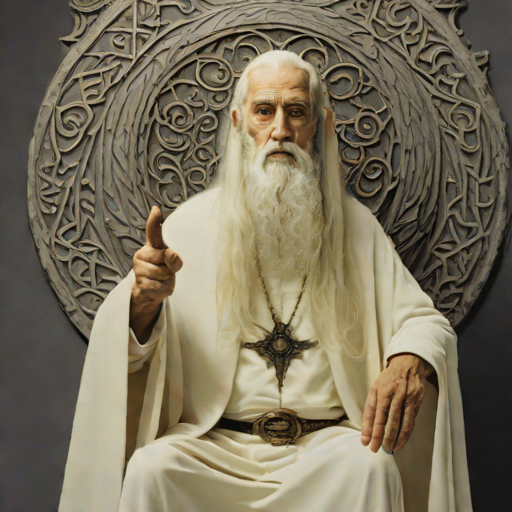

In [1]:
from IPython.display import display
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained(
    "stabilityai/sdxl-turbo",
    torch_dtype=torch.float16,
    variant="fp16")
pipe.to("cuda")
display(pipe(prompt="a photo of Saruman the white", num_inference_steps=5, guidance_scale=0.0).images[0])

In [5]:
# Audio Generation

from transformers import pipeline
from datasets import load_dataset
import soundfile as sf
import torch
from IPython.display import Audio
import numpy as np

converter = pipeline("text-to-speech", "microsoft/speecht5_tts", device="cuda")
speaker_embedding = torch.zeros(1, 512)
speech = converter(
    "Você invocou um modelo quebrado, parabéns.",
    forward_params={"speaker_embeddings": speaker_embedding}
)
speech = converter("You shall not pass!", forward_params={"speaker_embeddings": speaker_embedding})

Audio(speech['audio'], rate=speech['sampling_rate'])

Device set to use cuda
